<h1>Workshop on Python</h1>

In [8]:
import pandas as pd

In [9]:
data = pd.read_csv('churn.csv')
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,2,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,1,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,1,0,0,2,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,1,1,2,70.70,151.65,1
5,9305-CDSKC,0,0,0,0,8,1,1,2,0,...,1,0,1,1,1,1,2,99.65,820.5,1
6,1452-KIOVK,1,0,0,1,22,1,1,2,0,...,0,0,1,0,1,1,1,89.10,1949.4,0
7,6713-OKOMC,0,0,0,0,10,0,0,1,1,...,0,0,0,0,1,0,3,29.75,301.9,0
8,7892-POOKP,0,0,1,0,28,1,1,2,0,...,1,1,1,1,1,1,2,104.80,3046.05,1
9,6388-TABGU,1,0,0,1,62,1,0,1,1,...,0,0,0,0,2,0,0,56.15,3487.95,0


In [10]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# removing customer id as we are not going to use it in our analysis
del data['customerID']

In [12]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<h2>Plotting</h2>

Python uses different libraries to 

In [5]:
# matplotlib is the python library for plotting figures
# you can also use ggplot in python if you are coming from R background

import matplotlib.pyplot as mplt

print(len(data.columns))

20


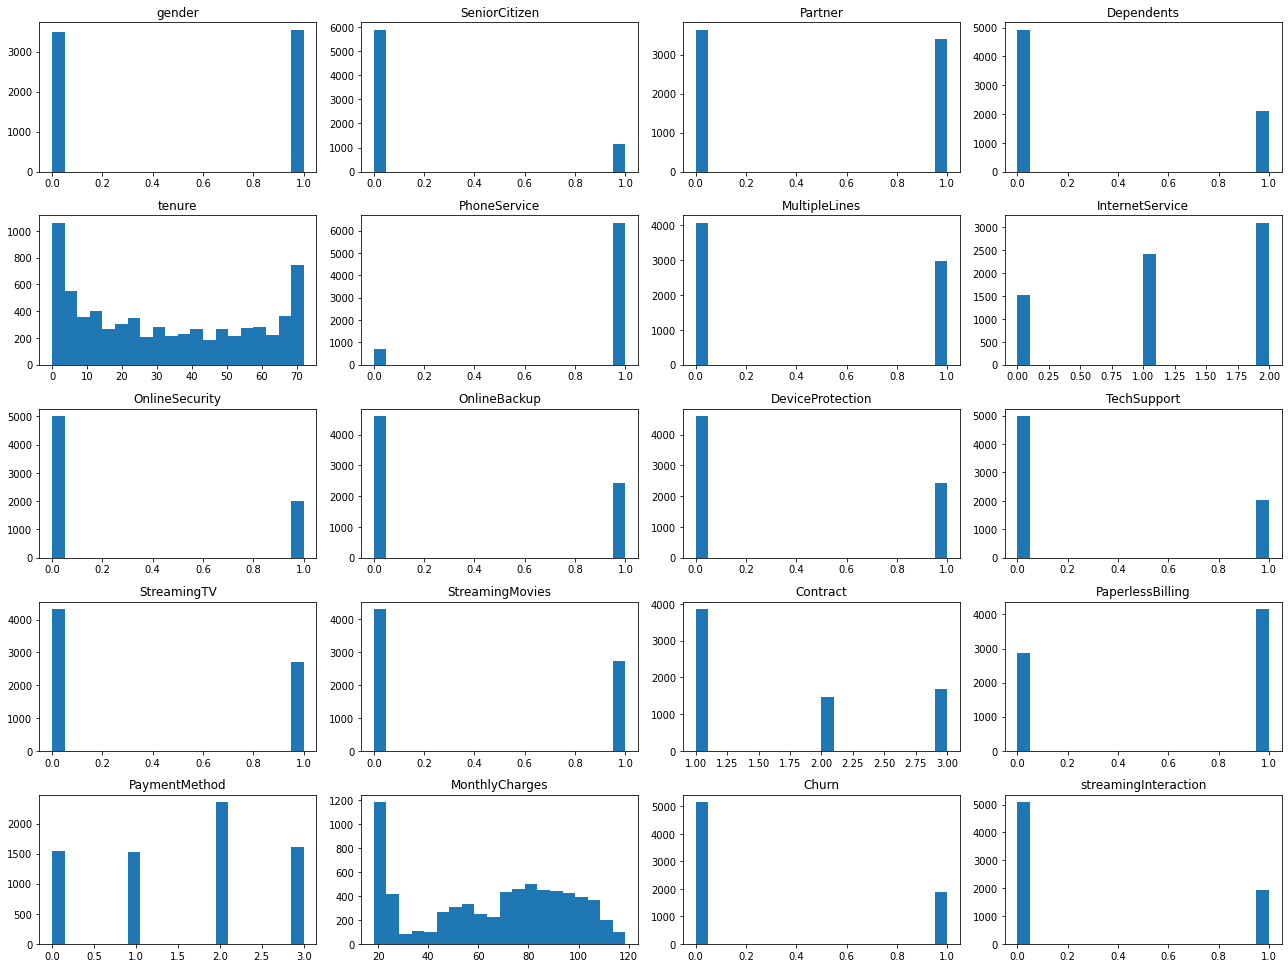

In [17]:
fig = mplt.figure(figsize=(18,16))

# plotting into 19 graphs, one for each column
# count in subplot starts from 1
count = 1
for j in range(5):
    for k in range(4):
        mplt.subplot(6,4,count)
        
        # plotting the histogram to see the distribution of the data
        mplt.hist(data[data.columns[count-1]],bins=20)   # python index starts from 0 (unlike subplot which starts from 1)
        mplt.title(data.columns[count-1])
        count += 1
        
mplt.tight_layout()  # this line of code just makes the plots look better

<h2>Data manipulation using pandas</h2>

<h3>removing columns</h3>

In [13]:
# total charges is a multiplication of two columns, so removing that column
del data['TotalCharges']

In [14]:
# adding a new column
# for example if we want to make a new column for interaction between streaming movies and streaming tv
# pandas have parallelization enabled : super fast and efficient
data['streamingInteraction'] = data['StreamingTV']*data['StreamingMovies']
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn', 'streamingInteraction'],
      dtype='object')

<h3>converting to one hot vector</h3>

In [16]:
# checking which variables can be converted into one hot vector
# for example, if gender is 1 for females, 2 for males and 3 for others, linearity does not make sense 
# however, we can find individual coefficients for females, males and others if we separate them out

# we can count the value of each of the element of the columns using value_counts() function
data['PaymentMethod'].value_counts()

2    2365
3    1612
0    1544
1    1522
Name: PaymentMethod, dtype: int64

In [19]:
# we can convert a lot of these vectors into one hot
# for an example, we convert the column PaymentMethod into one hot

# Note that we dont want to convert a binary vriable into one hot (for example representing 1 as [0,1] and 0 as [1,0])
# this is becasue it induces multicollinearity (as sum of these two columns will always be 1)
# similarly if we convert PaymentMethod into one hot vector, it will create 4 new columns: we need to consider just three
# as adding the fourth column will induce multicollinearity

one_hot = pd.get_dummies(data['PaymentMethod'],prefix='PaymentMethod')

In [20]:
one_hot.head() # 

,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [21]:
# since we dont need only 3 columns to avoid multicollinearity, we delete one of the columns
del one_hot['PaymentMethod_0']

In [22]:
# now we add the extra columns in the main data and remove the original column

# Drop column B as it is now encoded
data = data.drop('PaymentMethod',axis = 1)

# Join the encoded df
data = data.join(one_hot)

In [23]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'Churn', 'streamingInteraction', 'PaymentMethod_1', 'PaymentMethod_2',
       'PaymentMethod_3'],
      dtype='object')

<h3>checking for nan in the data (missing data)</h3>

In [24]:
# shows the rows if they have nan in it (missing value)
data[pd.isnull(data).any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,Churn,streamingInteraction,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3


In [49]:
# it shows that there are no missing elements in the data set (otherwise those rows would have been shown by the code)

<h3>creating a function</h3>

In [7]:
# in this function we convert the float into integers
def convert2int(x):
    return(int(x))

# apply and lambda are key words
data['newTotalCharges'] = data['MonthlyCharges'].apply(lambda x:convert2int(x))

<h2>Saving the file </h2>

In [25]:
# suppose we want to create a function 
# pandas use lambda to functions
# lets say we want to use square root of tenure
def sqroot(x):
    return(np.sqrt(max(0,x)))

data['tenure'] = data['tenure'].apply(lambda x:sqroot(x))

In [54]:
def sumo(a):
    d = 0
    for j in a:
        d += j
    return(d)

a = 6
print(sumo(a))

TypeError: 'int' object is not iterable

In [96]:
# we now save the file as X and Y for the machine learning model
data.to_csv('data.csv',index='False')

<h2>Running the machine learning model using sklearn library</h2>

In [42]:
# in the R code, we wrote a model Churn ~ a + b+ ...
# python automatically understands the modeling equation (from the name of the model) so dont need to write the equation

data = pd.read_csv('data.csv')
X = pd.DataFrame.copy(data)
# copy function is used to create the copy of an existing and changing X wont change data file
Y = data['Churn']
del X['Churn']


# we first create train and test data set, we test our model on train and predict performace on the test data set
# select 80% data for training and 20% for testing

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<h3>logistic regression</h3>

Always check the documentation of the library you are going to use. <br>
Logistic regression: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">logistic regression in sklearn</a>. Look for the parameters of the library and output from the model.

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logisticmodel = LogisticRegression(random_state=0,solver='lbfgs',max_iter=1000).fit(X_train, Y_train)

In [29]:
logisticmodel.coef_

array([[-0.04995444,  0.18109524,  0.09871901, -0.15852591, -0.34619396,
        -0.61327481,  0.33550031,  0.7663475 , -0.40168979, -0.14097286,
         0.00656352, -0.32789735,  0.07182664,  0.18470552, -0.70472324,
         0.34316751,  0.00382927,  0.31577789, -0.08871679,  0.26997441,
        -0.0781162 ]])

<h3>statsmodel</h3>


In [49]:
# stats model is another library. It provides better sumarized result
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.413560
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5612
Method:                           MLE   Df Model:                           21
Date:                Mon, 18 Jan 2021   Pseudo R-squ.:                  0.2854
Time:                        11:13:17   Log-Likelihood:                -2330.0
converged:                       True   LL-Null:                       -3260.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3663      0.200      1.829      0.067      -0.026       0.759

C:\Users\Ashutosh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [31]:
X_train.head()

,const,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,streamingInteraction,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
2142,1.0,0,0,0,1,4.582576,1,0,1,1,...,0,0,1,2,0,64.85,0,0,0,1
1623,1.0,0,0,0,0,7.348469,1,1,2,0,...,0,1,1,3,1,97.20,1,0,0,0
6074,1.0,1,0,1,0,1.000000,0,0,1,0,...,0,0,0,1,1,23.45,0,0,1,0
1362,1.0,1,0,0,0,2.000000,1,0,2,0,...,0,0,0,1,1,70.20,0,0,1,0
6754,1.0,1,0,0,1,0.000000,1,1,1,1,...,1,0,0,3,1,61.90,0,0,0,0


<h3>prediction and model performance</h3>

In [32]:
from sklearn import metrics

In [33]:
predict = logisticmodel.predict(X_test)

In [34]:
print ('Accuracy :', metrics.accuracy_score(Y_test, predict) )
print ('F1 score :', metrics.f1_score(Y_test, predict) )
print ('Recall   :', metrics.recall_score(Y_test, predict) )
print ('Precision:', metrics.precision_score(Y_test, predict) )

Accuracy : 0.815471965933286
F1 score : 0.6275071633237821
Recall   : 0.5871313672922251
Precision: 0.6738461538461539


<h3>XGBoost model</h3>

In [35]:
import xgboost as xgb


# pip install xgboost
# conda psuedo install xgboost

In [40]:
# setting parameters, again see the documentation for the library you are going to use
# look at the parameters. As a data scientist, you should know what is the effect of each of the parameter values
# you will need to build the models and optimize these parameters (select the best ones for your problem at hand)

param = {'max_depth': 5, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread']     = 4
param['eval_metric'] = 'auc'

In [43]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest  = xgb.DMatrix(X_test , label=Y_test)

num_round = 10
evallist = [(dtest, 'eval'), (dtrain, 'train')]
xgbmodel = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.842118	train-auc:0.847237
[1]	eval-auc:0.846592	train-auc:0.860025
[2]	eval-auc:0.850778	train-auc:0.86737
[3]	eval-auc:0.847899	train-auc:0.873871
[4]	eval-auc:0.846314	train-auc:0.880324
[5]	eval-auc:0.846884	train-auc:0.884921
[6]	eval-auc:0.844122	train-auc:0.889773
[7]	eval-auc:0.843478	train-auc:0.892846
[8]	eval-auc:0.839588	train-auc:0.896054
[9]	eval-auc:0.837846	train-auc:0.899574


In [44]:
dtest   = xgb.DMatrix(X_test)
predict = xgbmodel.predict(dtest)

In [45]:
# since it predicts in real number (0 - 1), we need to first convert it into binary
# this is a numpy method of converting to 0s and 1s from probability number
predict[predict<0.5]  = 0
predict[predict>=0.5] = 1

In [47]:
print ('Accuracy :', metrics.accuracy_score(Y_test, predict) )
print ('F1 score :', metrics.f1_score(Y_test, predict) )
print ('Recall   :', metrics.recall_score(Y_test, predict) )
print ('Precision:', metrics.precision_score(Y_test, predict) )

Accuracy : 0.794180269694819
F1 score : 0.5903954802259888
Recall   : 0.5603217158176944
Precision: 0.6238805970149254


<h2>NumPy</h2>

In [86]:
# think of numpy as a matrix 
# all the numpy operations are parallelized so they are super fast and efficient

import numpy as np

In [89]:
# data_np stores the value of directly from the pandas
# numpy and pandas are highly related to each other (and it will come up in lot of libraries you will use)
# for example, in the prediction above, the results (prediction) were provided in numpy format
data_np = data.values

In [90]:
data.shape, data_np.shape

((7043, 22), (7043, 22))

In [48]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64